# Функции и библиотеки

In [1]:
from graphlib.structures import Graph, Digraph
import graphlib.algorithms as alg 
import graphlib.tools as tls

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)

random.seed(0)

# Загрузка данных, количество ребер и вершин; плотность

In [2]:
%%time

G = Digraph('Google')
with open('datasets/web-Google.txt', 'r') as f:
    for line in f:        
        u, v = line.split()
        G.add_edge(u, v)
        
print(G)

Ориентированный граф <Google> с 875713 вершинами and 5105039 ребрами
Wall time: 10.6 s


# Выделение компонент сильной и слабой связности

In [3]:
%%time
number, largest_index, wcc = alg.weakly_components(G, largest=True)

Wall time: 9.6 s


In [4]:
print(f'Число компонент слабой связности - {number}')

largest_weak_component = G.subgraph(nodes=wcc[largest_index])
print(f'Наибольшая компонента связности: {largest_weak_component.nodes_count} вершин и {largest_weak_component.edges_count} ребер')

Число компонент слабой связности - 2746
Наибольшая компонента связности: 855802 вершин и 5066842 ребер


In [6]:
%%time
scc = list(alg.strongly_components_tarjan(G))

Wall time: 10.8 s


In [7]:
print('Число компонент сильной связности: ', len(scc))

largest_strong_component = G.subgraph(nodes=list(max(scc, key=lambda elem: len(elem))))
print(f'Наибольшая компонента сильной связности состоит из {largest_strong_component.nodes_count} вершин и {largest_strong_component.edges_count} ребер')
print(f'Доля вершин в наибольшей компоненте сильной связности: {round(largest_strong_component.nodes_count / G.nodes_count, 3)}')

Число компонент сильной связности:  371764
Наибольшая компонента сильной связности состоит из 434818 вершин и 3419124 ребер
Доля вершин в наибольшей компоненте сильной связности: 0.497


# Мета-граф

In [ ]:
%%time
C = alg.meta_graph(G, scc)

In [8]:
print(C)

Ориентированный граф <meta-graph> с 371764 вершинами and 517805 ребрами


# Перевод в неориентированный граф для дальнейшего анализа

In [ ]:
%%time
# перевод в неориентированный граф
G = G.to_simple()

In [12]:
print(G)
print(f'Плотность графа: {tls.density(G)}')

Граф <неориентированный граф, лежащий в основе Google> с 875713 вершинами and 4322051 ребрами
Плотность графа: 1.1271891119695635e-05
Wall time: 11.7 s


# Количество компонент связности, характеристики наибольшей компоненты

In [8]:
%%time

number, largest_index, components = alg.DFS_with_cc(G, largest=True)
largest_component = G.subgraph(nodes=components[largest_index])

Wall time: 8.62 s


In [9]:
print(f'Количество компонент связности - {number}')
print(f'Наибольшая компонента связности: {largest_component.nodes_count} вершин и {largest_component.edges_count} ребер',)

Количество компонент связности - 2746
Наибольшая компонента связности: 855802 вершин и 4291352 ребер


In [10]:
nodes_in_largest_component = largest_component.nodes
print(f'Доля вершин в наибольшей компоненте слабой связности: {round(largest_component.nodes_count / G.nodes_count, 3)}')

Доля вершин в наибольшей компоненте слабой связности: 0.977


## Доля вершин в текущей компоненте слабой связности при удалении x% случайных вершин

Wall time: 6.38 s


Text(0, 0.5, 'Доля вершин в наибольшей компоненте')

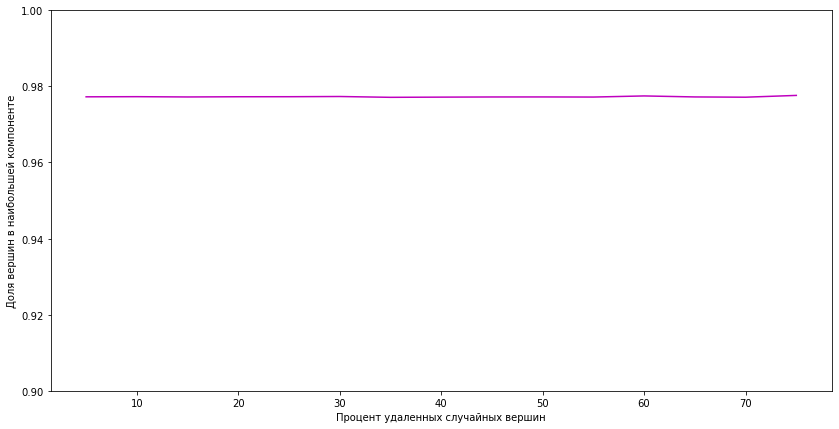

In [11]:
%%time

procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    n = round(G.nodes_count * (x/100)) # число удаляемых вершин
    removing_nodes = G.selection(x=n,
                                 most_degree=False)
    tmp_set = nodes_in_largest_component - removing_nodes
    proportion = len(tmp_set) / (G.nodes_count-n)
    props.append(proportion)
    

plt.figure(figsize=(14, 7))
plt.plot(procent_of_removing, props, 'm')
plt.ylim(0.9, 1)
plt.xlabel('Процент удаленных случайных вершин')
plt.ylabel('Доля вершин в наибольшей компоненте')

## Доля вершин в новой наибольшей компоненте слабой связности при удалении x% случайных вершин

Text(0, 0.5, 'Доля вершин в наибольшей компоненте')

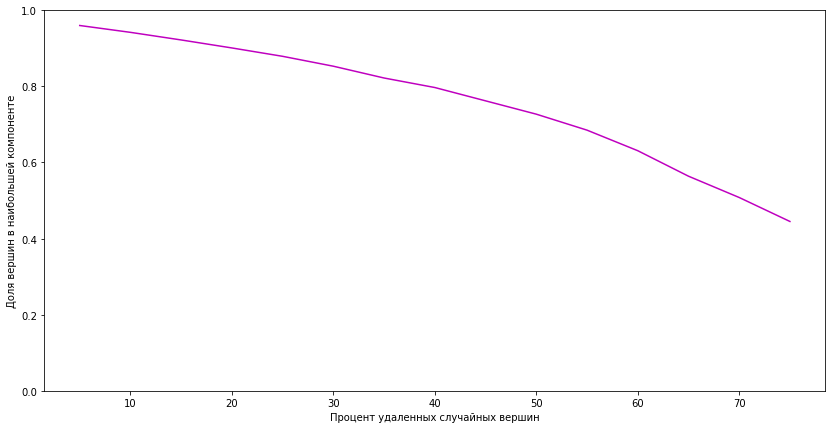

In [12]:
procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    # удаление вершин
    n = round(G.nodes_count * (x/100))
    removing_nodes = G.selection(x=n,
                                 most_degree=False)
    tmp_set = G.nodes - removing_nodes
    
    # выделение новой компоненты
    G_after_removing = G.subgraph(nodes=tmp_set)
    _, largest_i, cc = alg.DFS_with_cc(G_after_removing, largest=True)
    largest_c = G_after_removing.subgraph(nodes=cc[largest_i])
    
    # подсчет доли
    proportion = round(largest_c.nodes_count / G_after_removing.nodes_count, 3)
    props.append(proportion)

plt.figure(figsize=(14, 7))
plt.plot(procent_of_removing, props, 'm')
plt.ylim(0, 1)
plt.xlabel('Процент удаленных случайных вершин')
plt.ylabel('Доля вершин в наибольшей компоненте')

## Доля вершин в текущей компоненте слабой связности при удалении x% вершин наибольшей степени

Wall time: 12.8 s


Text(0, 0.5, 'Доля вершин в наибольшей компоненте')

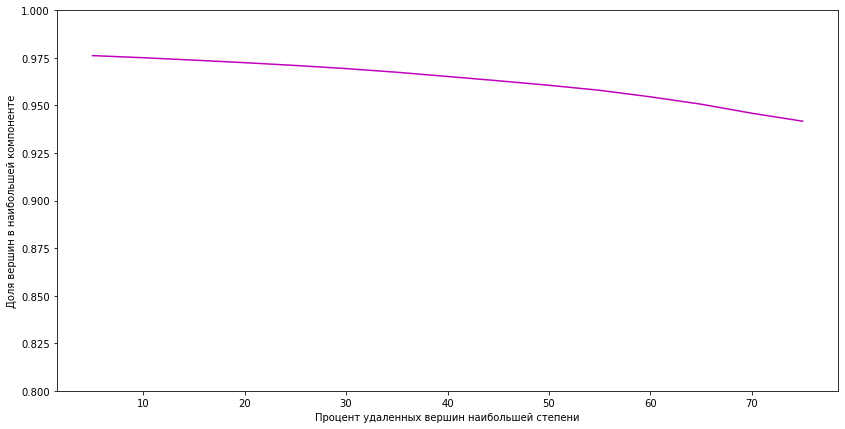

In [13]:
%%time

procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    n = round(G.nodes_count * (x/100)) # число удаляемых вершин
    removing_nodes = G.selection(x=n,
                                 most_degree=True)
    tmp_set = nodes_in_largest_component - removing_nodes
    proportion = len(tmp_set) / (G.nodes_count-n)
    props.append(proportion)
    

plt.figure(figsize=(14, 7))
plt.plot(procent_of_removing, props, 'm')
plt.ylim(0.8, 1)
plt.xlabel('Процент удаленных вершин наибольшей степени')
plt.ylabel('Доля вершин в наибольшей компоненте')

## Доля вершин в новой наибольшей компоненте слабой связности при удалении x%   вершин наибольшей степени

Text(0, 0.5, 'Доля вершин в наибольшей компоненте')

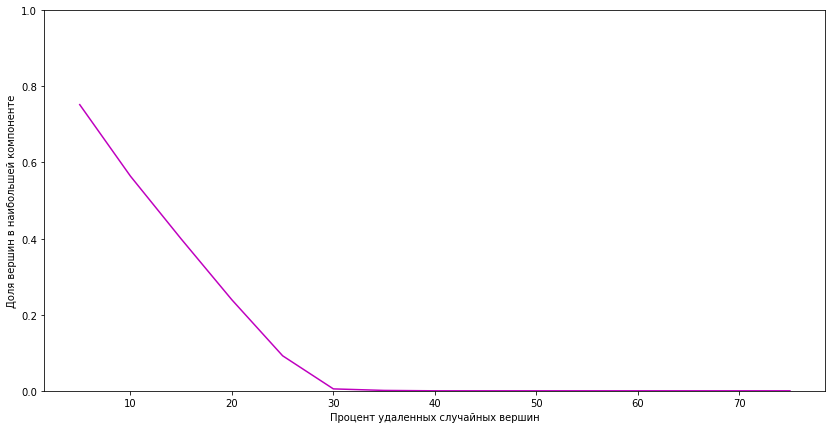

In [14]:
procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    # удаление вершин
    n = round(G.nodes_count * (x/100))
    removing_nodes = G.selection(x=n,
                                 most_degree=True)
    tmp_set = G.nodes - removing_nodes
    
    # выделение новой компоненты
    G_after_removing = G.subgraph(nodes=tmp_set)
    _, largest_i, cc = alg.DFS_with_cc(G_after_removing, largest=True)
    largest_c = G_after_removing.subgraph(nodes=cc[largest_i])
    
    # подсчет доли
    proportion = round(largest_c.nodes_count / G_after_removing.nodes_count, 3)
    props.append(proportion)

plt.figure(figsize=(14, 7))
plt.plot(procent_of_removing, props, 'm')
plt.ylim(0, 1)
plt.xlabel('Процент удаленных случайных вершин')
plt.ylabel('Доля вершин в наибольшей компоненте')

# Метрические характеристики графа: диаметр, радиус и 90 процентиль (approximation)

In [15]:
%%time

diam = tls.diameter_approximate(graph=largest_component,
                            number=500)

KeyboardInterrupt: 

In [16]:
%%time

radius = tls.radius_approximate(graph=largest_component,
                            number=500)

KeyboardInterrupt: 

In [17]:
%%time

percentile = tls.geodesic_percentile_approximate(graph=largest_component,
                                             number=500,
                                             percent=90)

KeyboardInterrupt: 

In [18]:
print(f'Диаметр наибольшей компоненты (приближенно): {diam}')
print(f'Радиус наибольшей компоненты (приближенно): {radius}')
print(f'90% процентиль геодезического расстояния в наибольшей компоненте (приближенно): {percentile}')

NameError: name 'diam' is not defined

# Функция вероятности для степени узла в графе
Минимальная, максимальная, средняя степень узла в графе. Надо построить функцию вероятности (можно в виде гистограммы относительных частот)

In [13]:
%%time
degrees = list(map(lambda elem: elem[1], list(G.node_degrees())))
max_deg = max(degrees)
min_deg = min(degrees)
mean_deg = int(sum(degrees)/ len(degrees))

Wall time: 1.4 s


In [14]:
print('Максимальная степень узла:', max(degrees))
print('Минимальная степень узла:', min(degrees))
print('Средняя степень узла:', int(sum(degrees)/len(degrees)))

Максимальная степень узла: 6332
Минимальная степень узла: 1
Средняя степень узла: 9


Text(0, 0.5, 'Количество вершин')

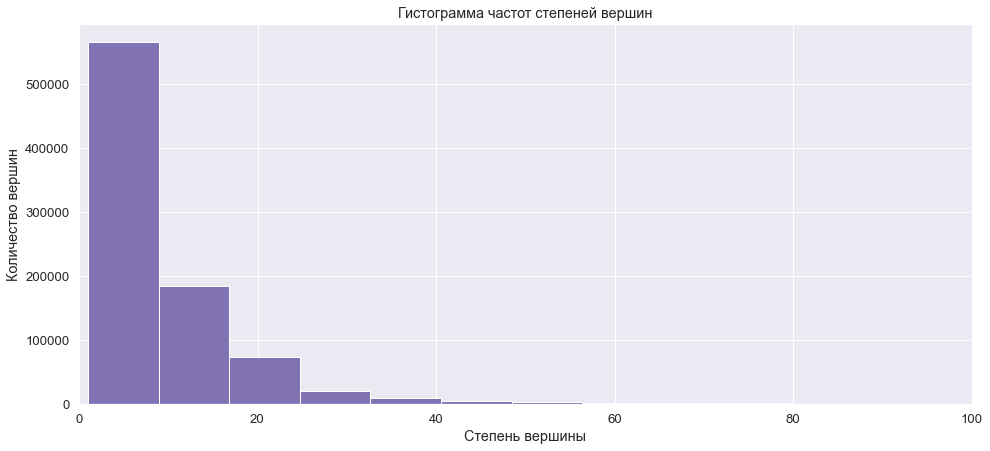

In [24]:
plt.figure(figsize=(16, 7))
plt.hist(np.array(degrees), bins=800, color='m')
plt.title('Гистограмма частот степеней вершин')
plt.xlim(0, 100)
plt.xlabel('Степень вершины')
plt.ylabel('Количество вершин')

Text(0, 0.5, 'Вероятность')

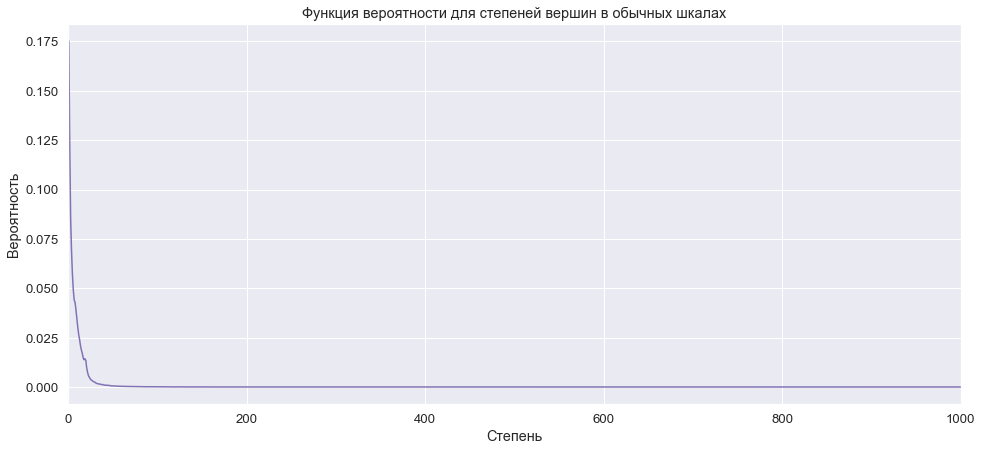

In [16]:
plt.figure(figsize=(16, 7))
x_axis = np.arange(min_deg, max_deg+1)
y_axis = np.bincount(degrees) / G.nodes_count
y_axis = y_axis[min_deg:] # не учитываем нулевую степень
plt.plot(x_axis, y_axis, c='m')

plt.xlim(0, 1000)
plt.title('Функция вероятности для степеней вершин в обычных шкалах')
plt.xlabel('Степень')
plt.ylabel('Вероятность')

Text(0, 0.5, 'Вероятность')

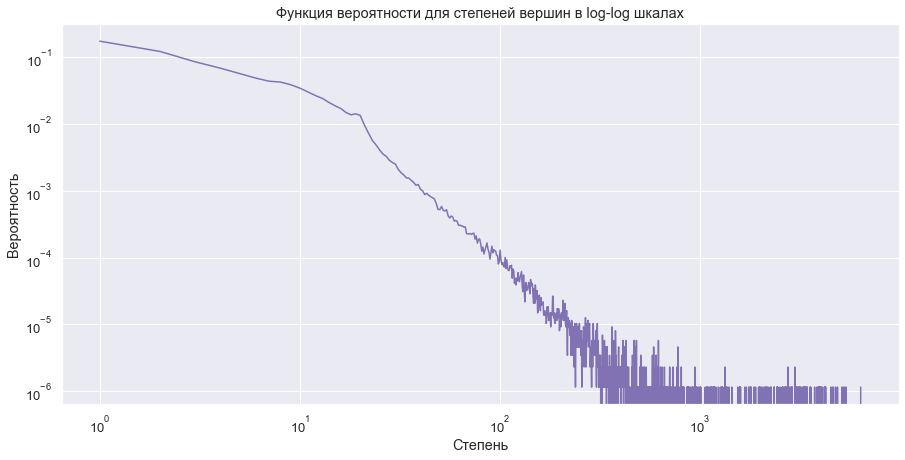

In [17]:
plt.figure(figsize=(15,7))
plt.loglog(x_axis, y_axis, c='m')
plt.title('Функция вероятности для степеней вершин в log-log шкалах')
plt.xlabel('Степень')
plt.ylabel('Вероятность')

# Число треугольников, глобальный и кластерный коэффициенты

In [29]:
%%time
n_of_triangles = tls.number_of_triangles(G)

Wall time: 16min 11s


In [30]:
%%time
average_cluster_coef = tls.average_clustering_coefficient(G)

Wall time: 12min 3s


In [31]:
%%time
global_cluster_coef = tls.global_clustering_coefficient(G)

Wall time: 12min 16s


In [32]:
print(f'Число треугольников (K_3) в графе: {n_of_triangles}')
print(f'Средний кластерный коэффициент сети: {average_cluster_coef}')
print(f'Глобальный кластерный коэффициент сети: {global_cluster_coef}')

Число треугольников (K_3) в графе: 13391903
Средний кластерный коэффициент сети: 0.5142961475353683
Глобальный кластерный коэффициент сети: 0.0552306264884374
